In [19]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('./data.csv')
df.head(15)

,Unnamed: 0,temperature,humidite,force_moyenne_du_vecteur_de_vent,force_du_vecteur_de_vent_max,pluie_intensite_max,date,quartier,sismicite,concentration_gaz,pluie_totale,catastrophe
0,0,5.7,75.6,3.8,4.3,0.0,2170-01-01,Zone 1,0.62,231.56,182.37,aucun
1,1,5.7,75.6,3.8,4.3,0.0,2170-01-01,Zone 2,0.94,248.20,903.20,['seisme']
2,2,5.7,75.6,3.8,4.3,0.0,2170-01-01,Zone 3,0.95,240.55,363.06,['seisme']
3,3,5.7,75.6,3.8,4.3,0.0,2170-01-01,Zone 4,0.39,159.10,473.93,aucun
4,4,5.7,75.6,3.8,4.3,0.0,2170-01-01,Zone 5,0.41,143.29,475.72,['innondation']
5,5,19.8,77.8,2.3,0.6,0.0,2171-01-01,Zone 1,0.66,276.74,605.97,['seisme']
6,6,19.8,77.8,2.3,0.6,0.0,2171-01-01,Zone 2,0.54,182.07,84.19,['innondation']
7,7,19.8,77.8,2.3,0.6,0.0,2171-01-01,Zone 3,0.74,177.30,161.78,aucun
8,8,19.8,77.8,2.3,0.6,0.0,2171-01-01,Zone 4,0.37,175.44,103.57,aucun
9,9,19.8,77.8,2.3,0.6,0.0,2171-01-01,Zone 5,0.50,127.11,560.36,aucun


In [20]:
with open('data.csv', 'r', encoding='utf-8') as f:
    content = f.read()
lines = content.split('\n')
lines = [line for line in lines if line.strip() != '']


In [21]:
# Process lines to fix quote issues
list_lines = []
for line in lines:
    if line.startswith('"'):
        line = line.replace('"""', '"')
        line = line.replace('""', '"')
        # Fix first character if it's a quote
        if line.startswith('"'):
            line = line[1:] + '\n'
    list_lines.append(line)



In [22]:
# Write the processed lines to a new CSV file
with open('data_new.csv', 'w', encoding='utf-8') as f:
    f.writelines([line + '\n' if not line.endswith('\n') else line for line in list_lines])

print(f"Processed {len(list_lines)} lines and saved to data_new.csv")

Processed 3396 lines and saved to data_new.csv


In [23]:
# Read the processed file to verify the result
try:
    df_new = pd.read_csv('data_new.csv')
    print(f"Successfully read the processed file with {len(df_new)} rows")
    print("Column names:", df_new.columns.tolist())
    display(df_new.head())
except Exception as e:
    print(f"Error reading processed file: {e}")

Successfully read the processed file with 3395 rows
Column names: ['Unnamed: 0', 'temperature', 'humidite', 'force_moyenne_du_vecteur_de_vent', 'force_du_vecteur_de_vent_max', 'pluie_intensite_max', 'date', 'quartier', 'sismicite', 'concentration_gaz', 'pluie_totale', 'catastrophe']


,Unnamed: 0,temperature,humidite,force_moyenne_du_vecteur_de_vent,force_du_vecteur_de_vent_max,pluie_intensite_max,date,quartier,sismicite,concentration_gaz,pluie_totale,catastrophe
0,0,5.7,75.6,3.8,4.3,0.0,2170-01-01,Zone 1,0.62,231.56,182.37,aucun
1,1,5.7,75.6,3.8,4.3,0.0,2170-01-01,Zone 2,0.94,248.20,903.20,['seisme']
2,2,5.7,75.6,3.8,4.3,0.0,2170-01-01,Zone 3,0.95,240.55,363.06,['seisme']
3,3,5.7,75.6,3.8,4.3,0.0,2170-01-01,Zone 4,0.39,159.10,473.93,aucun
4,4,5.7,75.6,3.8,4.3,0.0,2170-01-01,Zone 5,0.41,143.29,475.72,['innondation']


In [24]:
df = pd.read_csv('data_new.csv')

In [25]:
df.head(15)

,Unnamed: 0,temperature,humidite,force_moyenne_du_vecteur_de_vent,force_du_vecteur_de_vent_max,pluie_intensite_max,date,quartier,sismicite,concentration_gaz,pluie_totale,catastrophe
0,0,5.7,75.6,3.8,4.3,0.0,2170-01-01,Zone 1,0.62,231.56,182.37,aucun
1,1,5.7,75.6,3.8,4.3,0.0,2170-01-01,Zone 2,0.94,248.20,903.20,['seisme']
2,2,5.7,75.6,3.8,4.3,0.0,2170-01-01,Zone 3,0.95,240.55,363.06,['seisme']
3,3,5.7,75.6,3.8,4.3,0.0,2170-01-01,Zone 4,0.39,159.10,473.93,aucun
4,4,5.7,75.6,3.8,4.3,0.0,2170-01-01,Zone 5,0.41,143.29,475.72,['innondation']
5,5,19.8,77.8,2.3,0.6,0.0,2171-01-01,Zone 1,0.66,276.74,605.97,['seisme']
6,6,19.8,77.8,2.3,0.6,0.0,2171-01-01,Zone 2,0.54,182.07,84.19,['innondation']
7,7,19.8,77.8,2.3,0.6,0.0,2171-01-01,Zone 3,0.74,177.30,161.78,aucun
8,8,19.8,77.8,2.3,0.6,0.0,2171-01-01,Zone 4,0.37,175.44,103.57,aucun
9,9,19.8,77.8,2.3,0.6,0.0,2171-01-01,Zone 5,0.50,127.11,560.36,aucun


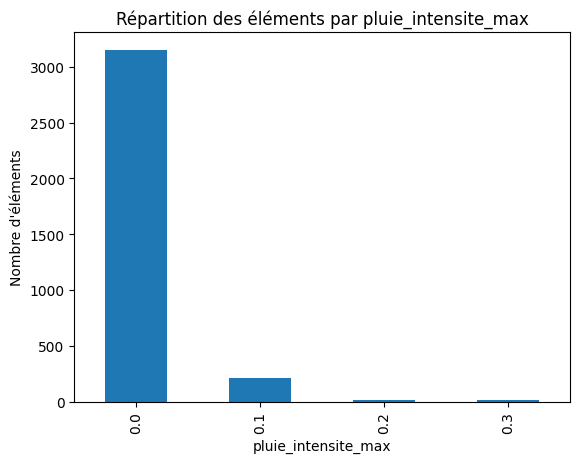

In [26]:
counts = df['pluie_intensite_max'].value_counts()
counts.plot(kind='bar')
plt.xlabel('pluie_intensite_max')
plt.ylabel("Nombre d'éléments")
plt.title("Répartition des éléments par pluie_intensite_max")
plt.show()

In [27]:
df.drop(columns=['Unnamed: 0', 'pluie_intensite_max'], inplace=True)

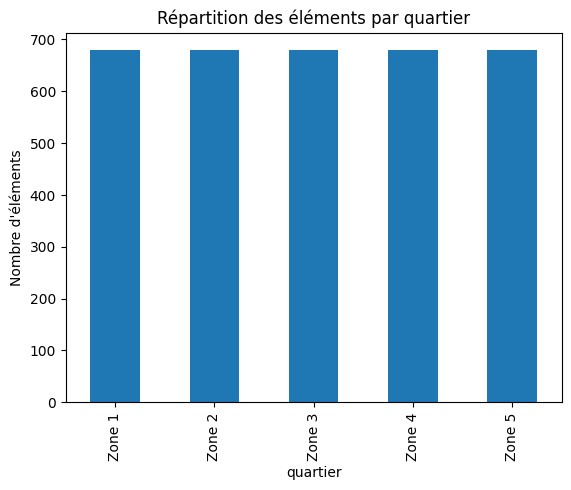

In [28]:
counts = df['quartier'].value_counts()
counts.plot(kind='bar')
plt.xlabel('quartier')
plt.ylabel("Nombre d'éléments")
plt.title("Répartition des éléments par quartier")
plt.show()

In [29]:
df.head(15)

,temperature,humidite,force_moyenne_du_vecteur_de_vent,force_du_vecteur_de_vent_max,date,quartier,sismicite,concentration_gaz,pluie_totale,catastrophe
0,5.7,75.6,3.8,4.3,2170-01-01,Zone 1,0.62,231.56,182.37,aucun
1,5.7,75.6,3.8,4.3,2170-01-01,Zone 2,0.94,248.20,903.20,['seisme']
2,5.7,75.6,3.8,4.3,2170-01-01,Zone 3,0.95,240.55,363.06,['seisme']
3,5.7,75.6,3.8,4.3,2170-01-01,Zone 4,0.39,159.10,473.93,aucun
4,5.7,75.6,3.8,4.3,2170-01-01,Zone 5,0.41,143.29,475.72,['innondation']
5,19.8,77.8,2.3,0.6,2171-01-01,Zone 1,0.66,276.74,605.97,['seisme']
6,19.8,77.8,2.3,0.6,2171-01-01,Zone 2,0.54,182.07,84.19,['innondation']
7,19.8,77.8,2.3,0.6,2171-01-01,Zone 3,0.74,177.30,161.78,aucun
8,19.8,77.8,2.3,0.6,2171-01-01,Zone 4,0.37,175.44,103.57,aucun
9,19.8,77.8,2.3,0.6,2171-01-01,Zone 5,0.50,127.11,560.36,aucun


In [30]:
df.to_parquet('dataset.parquet', index=False)

In [31]:
df = pd.read_parquet('dataset.parquet')

df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d', errors='coerce')
df['timestamp']    = df['date'].astype('int64') // 10**9
df['quartier'] = df['quartier'].replace({
    'Zone 1': 1,
    'Zone 2': 2,
    'Zone 3': 3,
    'Zone 4': 4,
    'Zone 5': 5,
})
df.to_csv('dataset.csv', index=False)

datasets_seisme = df[['date', 'sismicite', 'concentration_gaz', 'pluie_totale', 'catastrophe','quartier']]
datasets_inondation = df[['date', 'temperature', 'humidite', 'force_moyenne_du_vecteur_de_vent', 'force_du_vecteur_de_vent_max','quartier','pluie_totale','catastrophe']]

/var/folders/m9/n5d54_nd60l_9j9pz5np7rsm0000gn/T/ipykernel_22864/1152181686.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['quartier'] = df['quartier'].replace({


In [32]:
# 1) For rows that contain both events, keep only ['seisme']
mask_both = datasets_seisme['catastrophe'].apply(lambda x: 'innondation' in x and 'seisme' in x)
datasets_seisme.loc[mask_both, 'catastrophe'] = datasets_seisme.loc[mask_both, 'catastrophe'].apply(lambda _: ['seisme'])

# 2) Drop rows that only have 'innondation'
mask_innond_only = datasets_seisme['catastrophe'].apply(lambda x: 'innondation' in x and 'seisme' not in x)
datasets_seisme.drop(index=datasets_seisme[mask_innond_only].index, inplace=True)
# datasets_seisme['catastrophe'] = str(datasets_seisme['catastrophe'])

/var/folders/m9/n5d54_nd60l_9j9pz5np7rsm0000gn/T/ipykernel_22864/11870566.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datasets_seisme.drop(index=datasets_seisme[mask_innond_only].index, inplace=True)


In [33]:
# 1) For rows that contain both events, keep only ['seisme']
mask_both = datasets_inondation['catastrophe'].apply(lambda x: 'innondation' in x and 'seisme' in x)
datasets_inondation.loc[mask_both, 'catastrophe'] = datasets_inondation.loc[mask_both, 'catastrophe'].apply(lambda _: ['innondation'])

# 2) Drop rows that only have 'innondation'
mask_innond_only = datasets_inondation['catastrophe'].apply(lambda x: 'innondation' not in x and 'seisme' in x)
datasets_inondation.drop(index=datasets_inondation[mask_innond_only].index, inplace=True)
# datasets_inondation['catastrophe'] = str(datasets_inondation['catastrophe'])

/var/folders/m9/n5d54_nd60l_9j9pz5np7rsm0000gn/T/ipykernel_22864/1273903876.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datasets_inondation.drop(index=datasets_inondation[mask_innond_only].index, inplace=True)


In [34]:
datasets_seisme.head(15)

,date,sismicite,concentration_gaz,pluie_totale,catastrophe,quartier
0,2170-01-01,0.62,231.56,182.37,aucun,1
1,2170-01-01,0.94,248.20,903.20,['seisme'],2
2,2170-01-01,0.95,240.55,363.06,['seisme'],3
3,2170-01-01,0.39,159.10,473.93,aucun,4
5,2171-01-01,0.66,276.74,605.97,['seisme'],1
7,2171-01-01,0.74,177.30,161.78,aucun,3
8,2171-01-01,0.37,175.44,103.57,aucun,4
9,2171-01-01,0.50,127.11,560.36,aucun,5
10,2170-10-01,0.92,205.07,696.46,['seisme'],1
11,2170-10-01,0.84,299.35,331.73,[seisme],2


In [35]:
datasets_inondation.head(15)

,date,temperature,humidite,force_moyenne_du_vecteur_de_vent,force_du_vecteur_de_vent_max,quartier,pluie_totale,catastrophe
0,2170-01-01,5.7,75.6,3.8,4.3,1,182.37,aucun
3,2170-01-01,5.7,75.6,3.8,4.3,4,473.93,aucun
4,2170-01-01,5.7,75.6,3.8,4.3,5,475.72,['innondation']
6,2171-01-01,19.8,77.8,2.3,0.6,2,84.19,['innondation']
7,2171-01-01,19.8,77.8,2.3,0.6,3,161.78,aucun
8,2171-01-01,19.8,77.8,2.3,0.6,4,103.57,aucun
9,2171-01-01,19.8,77.8,2.3,0.6,5,560.36,aucun
11,2170-10-01,29.7,48.7,4.0,5.8,2,331.73,[innondation]
13,2170-10-01,29.7,48.7,4.0,5.8,4,321.36,['innondation']
14,2170-10-01,29.7,48.7,4.0,5.8,5,663.53,['innondation']


In [36]:
# Make sure 'catastrophe' is string, not list, otherwise Arrow will fail
datasets_seisme['catastrophe'] = datasets_seisme['catastrophe'] \
    .apply(lambda x: ','.join(x) if isinstance(x, list) else x)
datasets_inondation['catastrophe'] = datasets_inondation['catastrophe'] \
    .apply(lambda x: ','.join(x) if isinstance(x, list) else x)

# Now write out as parquet
datasets_seisme.to_parquet('./datasets/seisme/datasets_seisme.parquet', index=False)
datasets_inondation.to_parquet('./datasets/inondation/datasets_inondation.parquet', index=False)

/var/folders/m9/n5d54_nd60l_9j9pz5np7rsm0000gn/T/ipykernel_22864/2860102745.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datasets_seisme['catastrophe'] = datasets_seisme['catastrophe'] \
/var/folders/m9/n5d54_nd60l_9j9pz5np7rsm0000gn/T/ipykernel_22864/2860102745.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datasets_inondation['catastrophe'] = datasets_inondation['catastrophe'] \


In [37]:
# Unify 'seisme' labels in the seisme dataset
# Convert any entry containing "seisme" (whether list-like or string) to 'seisme', else 'aucun'
datasets_seisme['catastrophe'] = (
    datasets_seisme['catastrophe']
    .astype(str)
    .apply(lambda x: 'seisme' if 'seisme' in x else 'aucun')
)

# Verify the result
print(datasets_seisme['catastrophe'].value_counts())

catastrophe
aucun     1365
seisme     752
Name: count, dtype: int64


/var/folders/m9/n5d54_nd60l_9j9pz5np7rsm0000gn/T/ipykernel_22864/1682034288.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datasets_seisme['catastrophe'] = (


In [38]:
# Unify 'seisme' labels in the seisme dataset
# Convert any entry containing "seisme" (whether list-like or string) to 'seisme', else 'aucun'
datasets_inondation['catastrophe'] = (
    datasets_inondation['catastrophe']
    .astype(str)
    .apply(lambda x: 'innondation' if 'innondation' in x else 'aucun')
)

# Verify the result
print(datasets_inondation['catastrophe'].value_counts())

catastrophe
innondation    1495
aucun          1365
Name: count, dtype: int64


/var/folders/m9/n5d54_nd60l_9j9pz5np7rsm0000gn/T/ipykernel_22864/1579516118.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datasets_inondation['catastrophe'] = (


In [39]:
datasets_seisme.to_parquet('./datasets/seisme/datasets_seisme.parquet', index=False)
datasets_inondation.to_parquet('./datasets/inondation/datasets_inondation.parquet', index=False)

In [40]:
datasets_inondation.keys()

Index(['date', 'temperature', 'humidite', 'force_moyenne_du_vecteur_de_vent',
       'force_du_vecteur_de_vent_max', 'quartier', 'pluie_totale',
       'catastrophe'],
      dtype='object')

In [41]:
datasets_inondation.keys()

Index(['date', 'temperature', 'humidite', 'force_moyenne_du_vecteur_de_vent',
       'force_du_vecteur_de_vent_max', 'quartier', 'pluie_totale',
       'catastrophe'],
      dtype='object')